* Notice: Core-band signal has been up-sampled (for SBR mode)


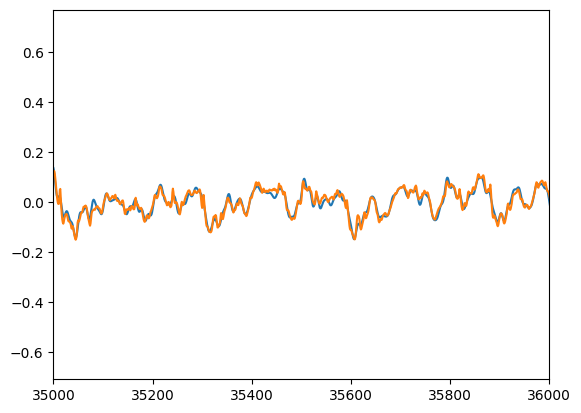

674150
674150


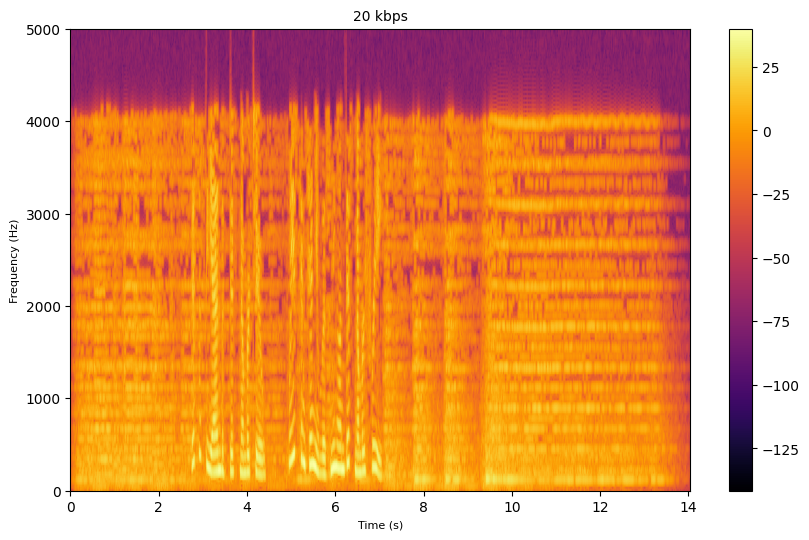

In [13]:
""" import core extractor module """
import sys
sys.path.append("/home/woongjib/Projects/SBR/aac_analysis")
from utils import profile_decoding_output

from utility import get_audio_paths, draw_spec
import librosa
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Audio, display

""" Single file decoding """
import soundfile
gt_path = "/home/woongjib/Projects/USAC44_GT/Alice.wav"
sbr_path = "/home/woongjib/Projects/USAC44_16kbps/Alice.m4a"

y,sr = librosa.load(gt_path, sr=None)

import os
orig_dir = os.getcwd()
os.chdir("/home/woongjib/Projects/SBR/aac_analysis")
try:
    outdict = profile_decoding_output(sbr_path)
    core = outdict['core'] / 32768
    plt.plot(core)
    plt.xlim(35000,36000)
    plt.show()
    draw_spec(core, sr=48000, colorbar=True, ylim=(0,5000),
              vmin=None,
          title='20 kbps'
        #   figsize=(6,4)
          )
    # soundfile.write("/home/woongjib/Projects/USAC44_16_core/Alice.wav", core, samplerate=48000)
    
finally:
    os.chdir(orig_dir)

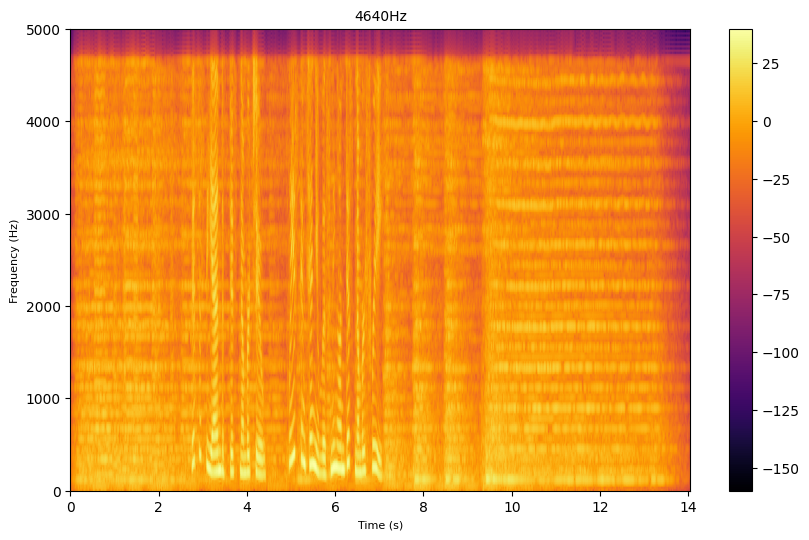

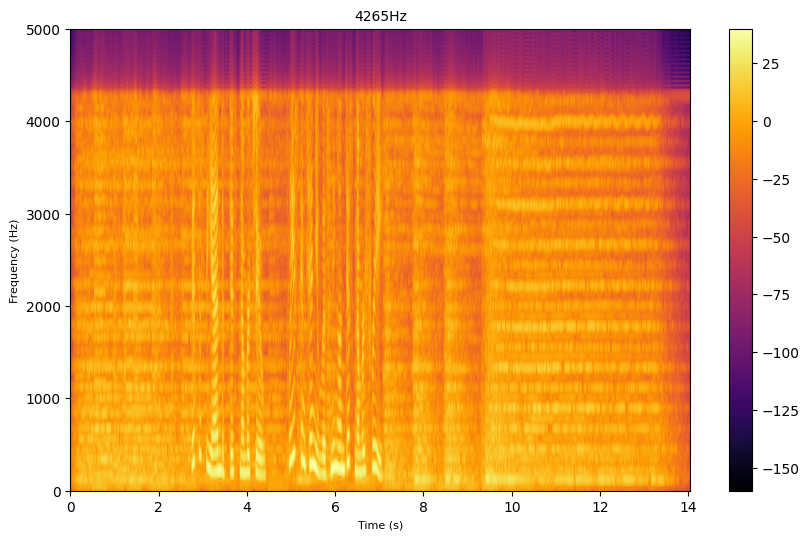

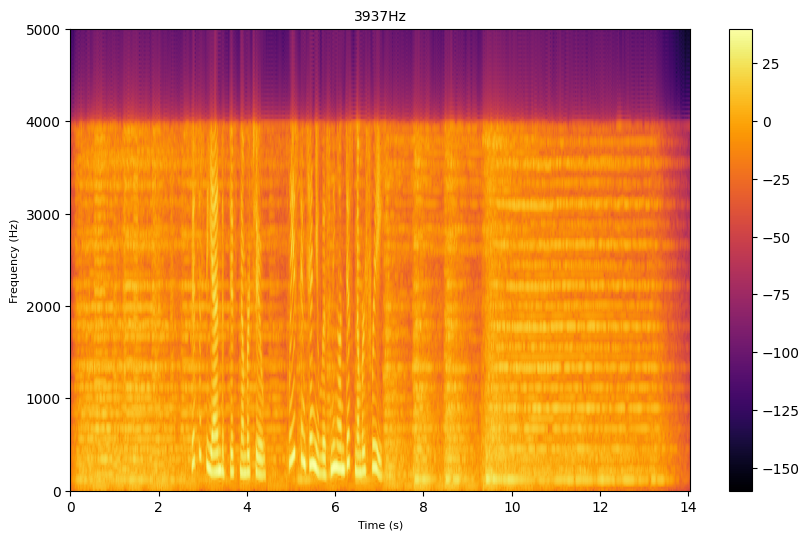

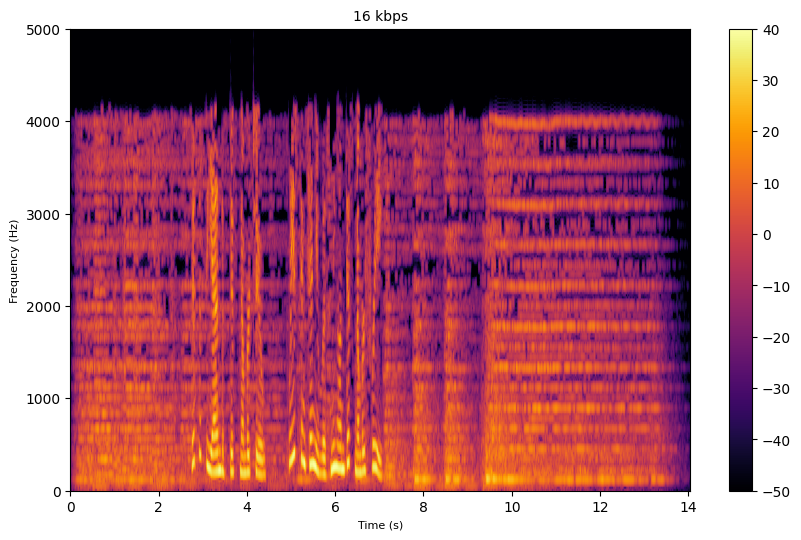

In [5]:
import torch
import torchaudio

"""Apply low pass filter"""
def apply_lowpass_filter(audio, sr, cutoff_freq):
    """Applies a lowpass filter to the audio signal using FFT-based filtering.
    
    Args:
        audio (Tensor): The audio signal to filter.
        sr (int): The sample rate of the audio.
        cutoff_freq (int): The cutoff frequency for the lowpass filter.
    
    Returns:
        Tensor: The filtered audio signal.
    """
    audio_fft = np.fft.fft(audio.squeeze().numpy())
    frequency = np.fft.fftfreq(audio_fft.size, d=1/sr)
    audio_fft[np.abs(frequency) > cutoff_freq] = 0
    filtered_audio = np.fft.ifft(audio_fft).real
    
    return torch.tensor(filtered_audio, dtype=audio.dtype)

path = "/home/woongjib/Projects/Dataset_BESSL/USAC44_mono_48k/Alice.wav"
y, sr = torchaudio.load(path)
y_lpf = apply_lowpass_filter(y, sr, cutoff_freq=4640).numpy()
draw_spec(y_lpf, sr=sr, colorbar=True, ylim=(0,5000),
          title='4640Hz',
          vmin=None,
        #   figsize=(6,4)
          )


y_lpf = apply_lowpass_filter(y, sr, cutoff_freq=4265).numpy()
draw_spec(y_lpf, sr=sr, colorbar=True, ylim=(0,5000),
          title='4265Hz',
          vmin=None,
        #   figsize=(6,4)
          )

y_lpf = apply_lowpass_filter(y, sr, cutoff_freq=3937).numpy()
draw_spec(y_lpf, sr=sr, colorbar=True, ylim=(0,5000),
          title='3937Hz',
          vmin=None,
        #   figsize=(6,4)
          )

y, sr = torchaudio.load("/home/woongjib/Projects/Dataset_BESSL/USAC44_mono_48k_core/Alice.wav")
draw_spec(y.numpy().squeeze(), sr=sr, colorbar=True, ylim=(0,5000),
          title='16 kbps'
        #   figsize=(6,4)
          )


In [ ]:
path = "/home/woongjib/Projects/Dataset_BESSL/USAC44_mono_48k/Alice.wav"
y, sr = torchaudio.load(path)
y_lpf = apply_lowpass_filter(y, sr, cutoff_freq=4640).numpy()
draw_spec(y_lpf, sr=sr, colorbar=True, ylim=(0,5000),
          title='4640Hz',
          vmin=None,
        #   figsize=(6,4)
          )

plt.plot(y.squeeze().numpy())
plt.plot(y_lpf)
plt.xlim(45000,45000+200)
plt.show()